<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', columns = ['trip_distance'])

taxi.query('trip_distance > 0 and trip_distance <= 50', inplace = True)
taxi.head()

,trip_distance
0,0.70
1,1.40
2,5.70
3,3.04
4,4.04


In [184]:
interval_range = pd.interval_range(start = 0, end = 20, freq=1, closed = 'right')
taxi['bin'] = pd.cut(taxi['trip_distance'], interval_range, right = True)
taxi

,trip_distance,bin
0,0.70,"(0, 1]"
1,1.40,"(1, 2]"
2,5.70,"(5, 6]"
3,3.04,"(3, 4]"
4,4.04,"(4, 5]"
...,...,...
2507104,11.26,"(11, 12]"
2507105,0.33,"(0, 1]"
2507106,2.16,"(2, 3]"
2507107,12.97,"(12, 13]"


In [185]:
freq_tab = pd.crosstab(index = taxi['bin'], columns='trips')
freq_tab

col_0,trips
bin,
"(0, 1]",539394
"(1, 2]",832183
"(2, 3]",428010
"(3, 4]",213627
"(4, 5]",111637
"(5, 6]",64987
"(6, 7]",44677
"(7, 8]",34458
"(8, 9]",30569


In [187]:
#check

taxi2 = pd.read_parquet('./yellow_tripdata_2021-05.parquet', columns = ['trip_distance'])

taxi2.query('trip_distance > 49 and trip_distance <= 50', inplace = True)

taxi2.count()

,0
trip_distance,27


TypeError: 'range' object is not callable

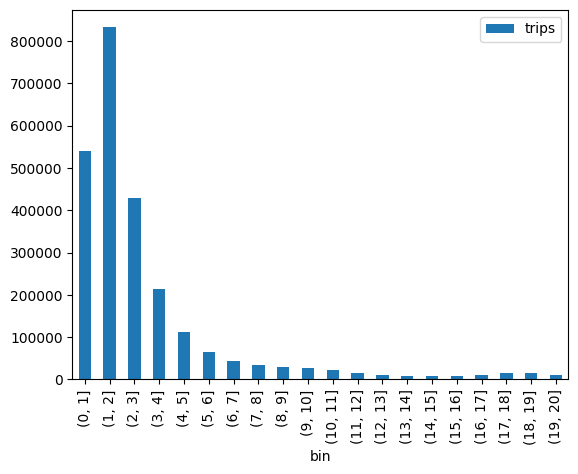

In [188]:
freq_tab.plot.bar(y = 'trips')
plt.xticks(rotation = 50, fontsize = 10)
plt.tight_layout()
plt.show()

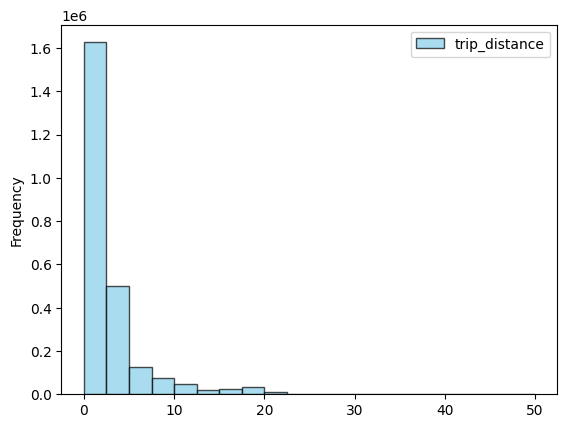

In [189]:
taxi.plot.hist(column = 'trip_distance', bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.show()

In [190]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', columns= ['tip_amount'])
taxi.query('tip_amount > 0 and tip_amount <= 20', inplace=True)
taxi.head()

,tip_amount
0,2.20
3,3.06
4,5.79
5,3.05
6,2.46


In [191]:
#Manual calculation for internal width
min = taxi['tip_amount'].min()
max = taxi['tip_amount'].max()

number_of_bins = 20

interval_width = (max - min) / number_of_bins
print(f'Width of a single bin: {interval_width} when yuo want to have {number_of_bins} bins.')


Width of a single bin: 0.9994999999999999 when yuo want to have 20 bins.


In [192]:
#Automatic calculations for intervals
abs_frequency, intervals = np.histogram(taxi['tip_amount'], bins=number_of_bins)

print('Automatically calculated intervals', abs_frequency, intervals,
len(abs_frequency), len(intervals))


Automatically calculated intervals [165597 477537 587771 270065 125159  52190  29224  22374  15296  17794
   6995   8900  13378   4377   2578   3178   1468    614    936   1024] [1.00000e-02 1.00950e+00 2.00900e+00 3.00850e+00 4.00800e+00 5.00750e+00
 6.00700e+00 7.00650e+00 8.00600e+00 9.00550e+00 1.00050e+01 1.10045e+01
 1.20040e+01 1.30035e+01 1.40030e+01 1.50025e+01 1.60020e+01 1.70015e+01
 1.80010e+01 1.90005e+01 2.00000e+01] 20 21


In [193]:
#create borders of intrvals

interval_range = pd.interval_range(start = 0, end = max, closed = 'right', freq = interval_width)

taxi['bin'] = pd.cut(taxi['tip_amount'], bins = interval_range)
taxi['bin'] = taxi['bin'].apply(lambda x: f'{x.left:.2f} - {x.right:.2f}')

In [99]:
taxi.head()

,tip_amount,bin
0,2.20,2.00 - 3.00
3,3.06,3.00 - 4.00
4,5.79,5.00 - 6.00
5,3.05,3.00 - 4.00
6,2.46,2.00 - 3.00


In [194]:
crossed_table = pd.crosstab(index = taxi['bin'], columns= 'interval_range')

In [195]:
crossed_table

col_0,interval_range
bin,
0.00 - 1.00,30214
1.00 - 2.00,506084
2.00 - 3.00,662511
3.00 - 4.00,289857
4.00 - 5.00,116255
5.00 - 6.00,69660
6.00 - 7.00,30330
7.00 - 8.00,22049
8.00 - 9.00,17542


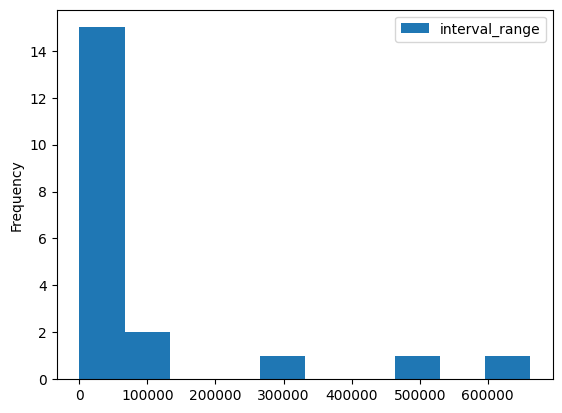

In [196]:
crossed_table.plot.hist(y = 'interval_range')
plt.show()

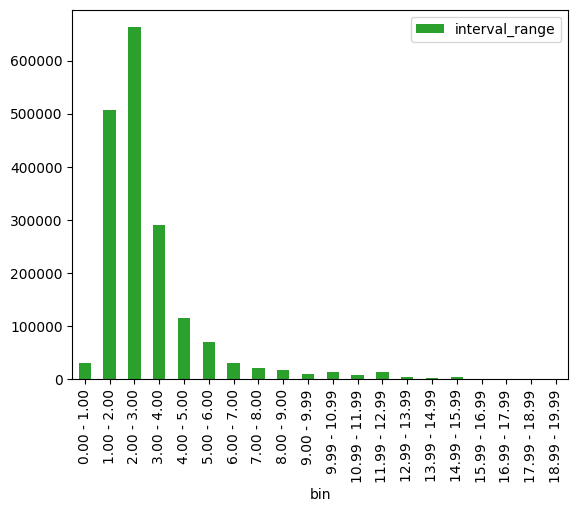

In [197]:
ax = crossed_table.plot.bar(y = 'interval_range', color = 'C2')
plt.show()

In [198]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', columns = ['trip_distance', 'tpep_pickup_datetime', "fare_amount","RatecodeID", 'tip_amount'])

taxi.query('tpep_pickup_datetime >= "2021-05-09" and tpep_pickup_datetime <= "2021-05-30"', inplace = True)
taxi.head()

,trip_distance,tpep_pickup_datetime,fare_amount,RatecodeID,tip_amount
350207,2.34,2021-05-26 11:19:22,11.0,1.0,2.30
350208,5.04,2021-05-26 11:42:48,18.0,1.0,0.00
565585,9.25,2021-05-09 08:02:47,26.0,1.0,7.42
570958,9.62,2021-05-09 09:22:48,28.0,1.0,0.00
576082,1.49,2021-05-09 09:41:01,7.0,1.0,2.00


In [199]:
def time_of_day(hour):
  if hour < 6:
     return 'night'
  elif hour < 12:
    return 'morning'
  elif hour < 18:
    return 'afternoon'
  else:
    return 'evening'


In [200]:
def trip_comment(trip_distance):
   if trip_distance < 1:
    return '1-mile'
   elif trip_distance < 2:
    return '2-miles'
   elif trip_distance < 3:
     return '3-miles'
   else:
     return '3+ miles'


In [201]:
taxi['time_of_day'] = taxi['tpep_pickup_datetime'].dt.hour.apply(time_of_day)
taxi['trip_comment'] = taxi['trip_distance'].apply(trip_comment)

In [202]:
taxi

,trip_distance,tpep_pickup_datetime,fare_amount,RatecodeID,tip_amount,time_of_day,trip_comment
350207,2.34,2021-05-26 11:19:22,11.00,1.0,2.30,morning,3-miles
350208,5.04,2021-05-26 11:42:48,18.00,1.0,0.00,morning,3+ miles
565585,9.25,2021-05-09 08:02:47,26.00,1.0,7.42,morning,3+ miles
570958,9.62,2021-05-09 09:22:48,28.00,1.0,0.00,morning,3+ miles
576082,1.49,2021-05-09 09:41:01,7.00,1.0,2.00,morning,2-miles
...,...,...,...,...,...,...,...
2501391,3.87,2021-05-29 23:39:34,18.19,NaN,4.83,evening,3+ miles
2501392,7.09,2021-05-29 23:10:00,24.71,NaN,6.35,evening,3+ miles
2501393,2.23,2021-05-29 23:53:28,12.46,NaN,2.61,evening,3-miles
2501394,1.24,2021-05-29 23:51:00,28.86,NaN,2.00,evening,2-miles


In [203]:
cross_tab = pd.crosstab(taxi['time_of_day'], taxi['trip_comment'])
cross_tab = cross_tab.reindex(['morning','afternoon','evening','night'])
cross_tab = cross_tab[['1-mile','2-miles','3-miles','3+ miles']]
cross_tab

trip_comment,1-mile,2-miles,3-miles,3+ miles
time_of_day,,,,
morning,92084,144043,73693,106267
afternoon,167913,254131,126339,176391
evening,100301,173283,95317,156054
night,12304,21224,13239,37794


Text(0.5, 1.0, 'Trip distance by time of th day.')

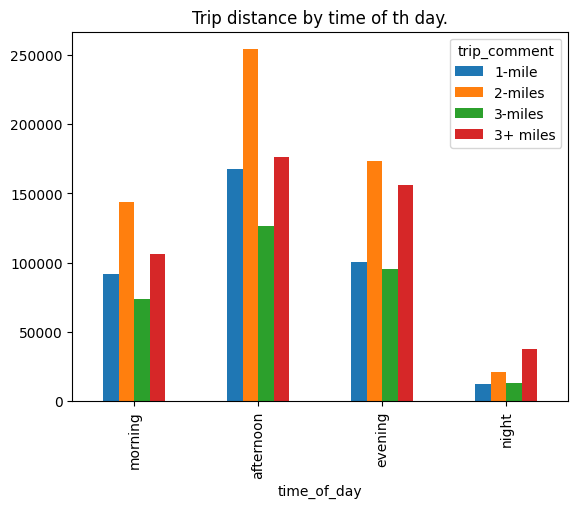

In [204]:
cross_tab.plot.bar()
plt.title('Trip distance by time of th day.')

In [205]:
taxi

,trip_distance,tpep_pickup_datetime,fare_amount,RatecodeID,tip_amount,time_of_day,trip_comment
350207,2.34,2021-05-26 11:19:22,11.00,1.0,2.30,morning,3-miles
350208,5.04,2021-05-26 11:42:48,18.00,1.0,0.00,morning,3+ miles
565585,9.25,2021-05-09 08:02:47,26.00,1.0,7.42,morning,3+ miles
570958,9.62,2021-05-09 09:22:48,28.00,1.0,0.00,morning,3+ miles
576082,1.49,2021-05-09 09:41:01,7.00,1.0,2.00,morning,2-miles
...,...,...,...,...,...,...,...
2501391,3.87,2021-05-29 23:39:34,18.19,NaN,4.83,evening,3+ miles
2501392,7.09,2021-05-29 23:10:00,24.71,NaN,6.35,evening,3+ miles
2501393,2.23,2021-05-29 23:53:28,12.46,NaN,2.61,evening,3-miles
2501394,1.24,2021-05-29 23:51:00,28.86,NaN,2.00,evening,2-miles


<Axes: xlabel='fare_amount', ylabel='tip_amount'>

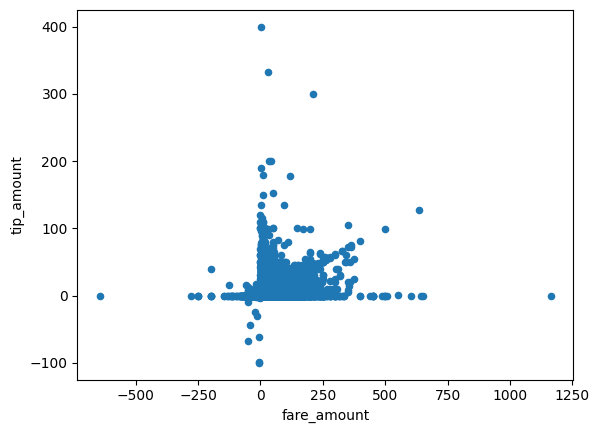

In [206]:
# too much data - the plot is unreadable
taxi.plot.scatter(x = 'fare_amount', y = 'tip_amount')

In [211]:
#Reduce the data volume
taxi = taxi.query('tip_amount <= 100 and fare_amount > 0 and RatecodeID == 4')

<Axes: xlabel='fare_amount', ylabel='tip_amount'>

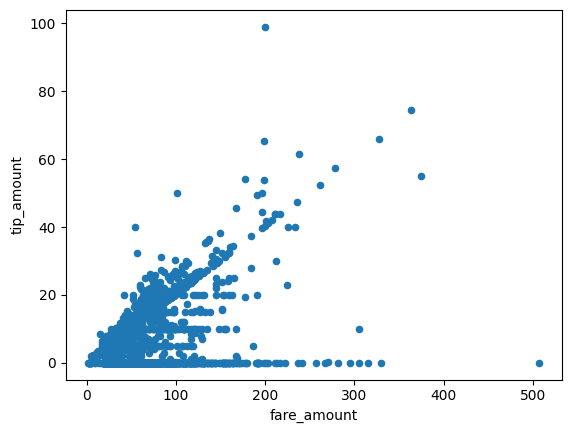

In [212]:
taxi.plot.scatter(x = 'fare_amount', y = 'tip_amount')

In [214]:
b = [1, 32, 32, 11, 7, 44, 5, 43, 23]
a = pd.Series(b)
b

[1, 32, 32, 11, 7, 44, 5, 43, 23]

In [241]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet',
 columns=['trip_distance', 'tpep_pickup_datetime', "fare_amount","RatecodeID"])

taxi.query("tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'",
 inplace=True)


taxi.head()

,trip_distance,tpep_pickup_datetime,fare_amount,RatecodeID
565585,9.25,2021-05-09 08:02:47,26.0,1.0
570958,9.62,2021-05-09 09:22:48,28.0,1.0
576082,1.49,2021-05-09 09:41:01,7.0,1.0
576083,14.44,2021-05-09 10:27:38,40.0,1.0
586667,10.58,2021-05-09 12:00:52,30.0,1.0


In [243]:
taxi['time_of_day'] = taxi['tpep_pickup_datetime'].dt.hour.apply(time_of_day)
taxi['trip_comment'] = taxi['trip_distance'].apply(trip_comment)

taxi.head(2)

,trip_distance,tpep_pickup_datetime,fare_amount,RatecodeID,time_of_day,trip_comment
565585,9.25,2021-05-09 08:02:47,26.0,1.0,morning,3+ miles
570958,9.62,2021-05-09 09:22:48,28.0,1.0,morning,3+ miles


In [249]:
table_c = pd.crosstab(taxi["time_of_day"], taxi['trip_comment'], values=taxi['fare_amount'], aggfunc = 'sum')
table_c

trip_comment,1-mile,2-miles,3+ miles,3-miles
time_of_day,,,,
afternoon,38479.34,73339.53,216406.27,57601.25
evening,23092.49,36516.47,144380.63,28024.64
morning,16461.08,28375.33,97570.21,21964.66
night,6564.86,11731.78,52395.87,9855.89


In [250]:
table_c = table_c[['1-mile','2-miles','3-miles','3+ miles']]
table_c = table_c.reindex(['morning','afternoon','evening','night'])

table_c

trip_comment,1-mile,2-miles,3-miles,3+ miles
time_of_day,,,,
morning,16461.08,28375.33,21964.66,97570.21
afternoon,38479.34,73339.53,57601.25,216406.27
evening,23092.49,36516.47,28024.64,144380.63
night,6564.86,11731.78,9855.89,52395.87


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000')])

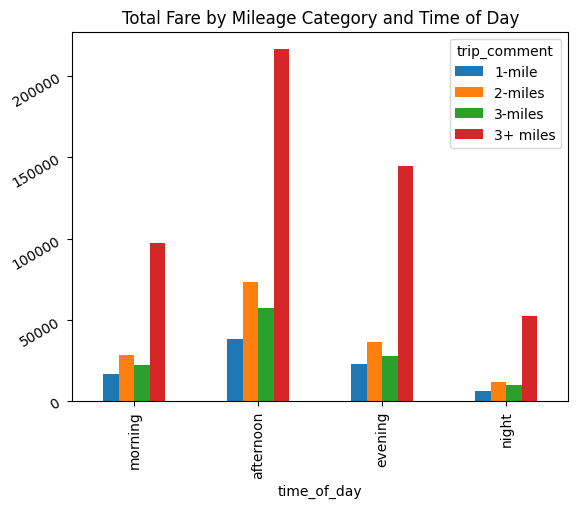

In [256]:
table_c.plot.bar()
plt.title('Total Fare by Mileage Category and Time of Day')
plt.yticks(rotation = 30)

Text(0.5, 1.0, 'Scatter plot trip_distance vs fare_amount')

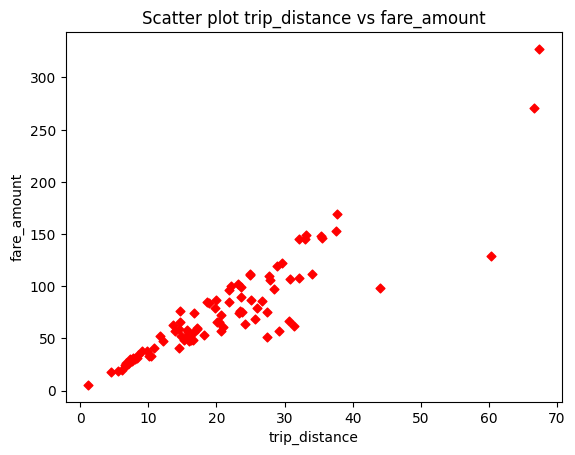

In [259]:
#Reduce the data volume fos scatter plot
taxi.query("fare_amount>0 and RatecodeID==4", inplace=True)

taxi.plot.scatter(x='trip_distance', y='fare_amount', marker = 'D', color = 'red')
plt.title('Scatter plot trip_distance vs fare_amount')

<Axes: >

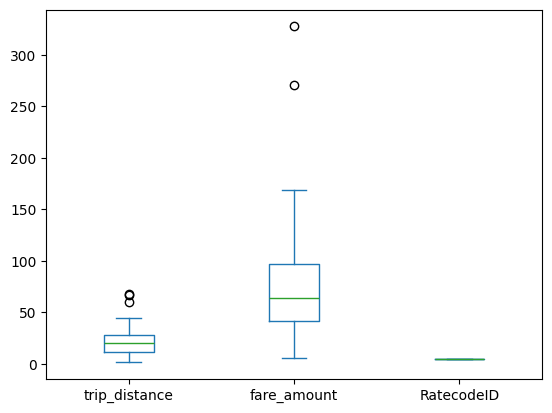

In [262]:
#Box Plot of Numerical Variables
taxi.plot(kind = 'box')